# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

Ans: In this assignment, we have to predict whether a student will 'pass' or 'fail' from a given set of features.  This is a classification problem because we have to classify students into distinct classes. If it is a regression problem, we have to predict continuous output. Therefore it could be a regression problem if we want to predict the score of final exam.

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit


In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns


Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [4]:
#student_data.describe()
#student_data.shape[0]
#print len(student_data)
x = student_data.passed.value_counts()
x['yes']
#student_data.head(1)


265

In [5]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = student_data.shape[0]
n_features = student_data.shape[1]-1

x = student_data.passed.value_counts()

n_passed = x['yes']
n_failed = x['no']
grad_rate = 100*float(n_passed)/float(n_students)
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [128]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows
print y_all.describe()

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [129]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [293]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
#student_data['passed'] = format(student_data['passed'])
y = student_data['passed']

def shuffle_split_data(X,y,num_train):
    s = StratifiedShuffleSplit(y, 1, train_size=num_train)
    # only one iteration
    for train_index, test_index in s:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    return X_train, X_test, y_train, y_test
    
#X_train, X_test, y_train, y_test = shuffle_split_data(X_all, y,num_train )
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=300, random_state=84)

    
print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data


Training set: 300 samples
Test set: 95 samples



## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What is the theoretical O(n) time & space complexity in terms of input size?
- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

###Ans:

Data characteristics: The dataset contains data from 395 students. Every student data contain 30 features. Target label 'Passed' contains categorical variable: 'yes' and 'no'. Among the students, 265 passed and 135 failed. Graduation rate of the class is around 67.09%. 

There are several issues with the dataset.
- The number of features is pretty large compare to number of students. In order to classify accurately, the number of training instances needed to increase exponentially as the number of features increase. Therefore, the prediction model will suffer from the curse of dimensionality [1] and the prediction/classification might be overfitted.

- The number students passed and failed are not equal. Some models might be performed poorly under this imbalanced condition. Furthermore, when we just simply split data into test and training sets, there are possibilities when the training set might contain very failed student data and as a result, the prediction model will perform poorly.
In order overcome this issue, we applied Stratified Shuffle Split from scikit-learn. Stratified shuffle split ensures the constant ratio of passed and failed students in test and training datasets.



Accuracy measurement: Accuracy of this prediction model is measured by F1 score. F1 score takes into account both precision and recall scores. 


For this problem, we choose Random Forest, Naive Bayes and Support vector machine classifier.

Random forest classifier is an ensemble learning method that operates by constructing a number of decision tress on various sub-sample of input dataset and use average of the prediction as the final prediction output.
Strengths:
1.	Random forest can deal with unbalanced data. It has methods for balancing error in class population unbalanced data sets [1]
2.	Runs efficiently on large dataset with numerous number of input features
3.	Robust against outliers.
4.	Do not overfit like decision tress [2].
5. Provides an estimate of variable importance. 

Weakness:
1.	The process is very computation intensive.
2.	Usually require large dataset.
3.	Prone to overfitting when it is applied outside the range of training dataset.
4.  Difficult to interpret.

Application of Random Forest:
1. Process fault detection/diagnosis in semiconductor and automotive industry[3]
2. Body movement prediction for microsoft kinect [4].
3. Bio-informatics [5].

Why random forest?
Although the dataset is small, I decided to apply Random Forest for following reasons:
1.	To check Random Forest classifier’s performance on small datasets with large number of features.
2.	To check whether a computation intensive Random Forest classifier is a viable option against other simple classifier under given budget constraints.

Naive Bayes Classifier 
The Naive Bayesian classifier is based on Bayes’ theorem with naïve assumptions of independence between the features. 
Strengths [6]:
1.	Extremely fast even with very large dataset.
2.	Can work with small dataset.
3.	Easy to implement.
4.	Robust to noise. 


Weakness:
1.	In practice, naïve assumptions of independence between the features is very rare.
2.	Shows poor performance in case of nonlinear classification problems.

Application of Naive Bayes [7]:
1. Text classification.
2. Spam filtering.
3. Sentiment analysis.
4. Online marketing.

Why Naive Bayes:
1.	Small dataset
2.	Compare the performance between simple solution to computational intensive solution

Support vector machine (SVM) classifier
SVM classifier is a non-probabilistic parametric based classifier for supervised learning.  It constructs linear hyperplane or set of hyperplanes for separating data points. Linear hyperplanes are used through the kernels for nonlinear classification problems.
Strengths[8]:
1.	High accuracy.
2.	Works well with unbalanced data.
3.	Do not suffer from multicollinearity.

Weakness [8]:
1.	Time consuming process.
2.  Process complexity increases nonlinearly with large dataset [9].
2.	Picking/finding the right kernel can be a challenge

Application of SVM:
1. Financial time series prediction [10].
2. Sentiment analysis.
3. Pattern recogmition [9].
3. Oil and gas industry

Why SVM:
SVM is chosen because:
1. SVM can produce highly accurate result with unbalanced small data.
2. Compare the performance of SVM with computation intensive Random Forest classifier and simple Naive Baayes. Find a balance between accuracy and expense of computation.
 



In [323]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)
    return end-start

# TODO: Choose a model, import it and instantiate an object
from sklearn.svm import SVC
svc_clf = SVC(kernel='linear')

# Fit model to training data
train_classifier(svc_clf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

Training SVC...
Done!
Training time (secs): 0.015


0.014999866485595703

In [324]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes'), end-start

train_f1_score,train_time = predict_labels(svc_clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for training set: 0.836363636364


In [325]:
# Predict on test data
test_f1_score,test_time = predict_labels(svc_clf, X_test, y_test)
print "F1 score for test set: {}".format(test_f1_score)

Predicting labels using SVC...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.819444444444


In [313]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    x=train_classifier(clf, X_train, y_train)
    f1_score_train,train_time= predict_labels(clf, X_train, y_train)
    print "F1 score for training set: {}".format(f1_score_train)
    f1_score_test,test_time= predict_labels(clf, X_test, y_test)
    print "F1 score for test set: {}".format(f1_score_test)
    return (f1_score_train, f1_score_test, x,test_time)

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

In [314]:
# TODO: Train and predict using two other models

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200)

# Fit model to training data
#train_classifier(rf_clf, X_train, y_train)  # note: using entire training set here
#print rf_clf
train_predict(rf_clf, X_train, y_train, X_test, y_test)

------------------------------------------
Training set size: 300
Training RandomForestClassifier...
Done!
Training time (secs): 0.163
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.023
F1 score for training set: 1.0
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.023
F1 score for test set: 0.81045751634


(1.0, 0.81045751633986929, 0.16300010681152344, 0.023000001907348633)

In [315]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB(alpha=.01)
print nb_clf
train_predict(nb_clf, X_train, y_train, X_test, y_test)


MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
------------------------------------------
Training set size: 300
Training MultinomialNB...
Done!
Training time (secs): 0.001
Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.805620608899
Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.814285714286


(0.80562060889929743, 0.81428571428571428, 0.0010001659393310547, 0.0)

In [316]:

#X_train
#train_predict(nb_clf, x1, y1, X_test, y_test)

In [326]:
### Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

def compare_algorithm(algorithm, size):
    for i in algorithm:
        training_time = []
        prediction_time = []
        f1_train_score = []
        f1_test_score = []
        z = ['train_size','train_time','f1_train','test_time','f1_test']
        for j in size:
            if j<300:
                x1,x2,y1,y2 =  train_test_split(X_train, y_train,train_size=j,random_state=84)
            elif j==300:
                x1,y1 =  X_train, y_train
            total_f1_train_score,total_f1_test_score,total_training_time, total_prediction_time=train_predict(i, x1, y1, X_test, y_test)
            training_time.append(total_training_time)
            prediction_time.append(total_prediction_time)
            f1_train_score.append(total_f1_train_score)
            f1_test_score.append(total_f1_test_score)
            
        tab= [size,training_time,f1_train_score,prediction_time,f1_test_score]
        tab = pd.DataFrame(tab)
        tab[' ']=z
        tab = tab[[' ',0,1,2]]
        print "------------------------------------------"
        print "Summary Table"
        print "------------------------------------------"
        print tab
            
compare_algorithm([nb_clf,rf_clf,svc_clf],[100,200,300])


------------------------------------------
Training set size: 100
Training MultinomialNB...
Done!
Training time (secs): 0.001
Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.794117647059
Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.791366906475
------------------------------------------
Training set size: 200
Training MultinomialNB...
Done!
Training time (secs): 0.001
Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.804195804196
Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.820143884892
------------------------------------------
Training set size: 300
Training MultinomialNB...
Done!
Training time (secs): 0.001
Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.805620608899
Predicting labels using Multinomial

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?

####Ans:
From the experiments, we can conclude that all three models (Naive Bayes, Random Forest and SVM) performed reasonably well. F1 score shows that the Random forest classifiers is the most accurate and Naive Bayes is the least accurate. However, from time comparison, Random forest classifiers required most time to train models. In contrast of Naive Bayes and Random Forest, SVM classifer produces very good accuracy (f1_test=0.870) with very small training time. Therefore, I think SVM will be the best one for this problem based on the available data, limited resources and budget constraints.


- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.

####Ans:
SVM is a linear classification technique which assume that your data are linearly separable. SVM works on the principle of margin maximization i.e. it involves finding the hyperplane that best separates two classes of points with the maximum margin. Essentially, it is a constrained optimization problem where the margin is maximized subject to the constraint. Maximized margin makes the probability of missclassifying test data lower.

SVM is a linear seperation classification techniques. Lets explain its principle with following example where we want to classify points of two classes: class 1-green and  and class 2-red (figure 1). These two classes of point can be linearly seperable by infinite number of lines. However, SVM will search for a line that seperates the two classes by a maximum margin and for this example, the maximum margin line solid black line in figure 2. Generally, SVM try to draw curve between different features to seperate different classes for two dimensional problem. For higher dimensional problem, SVM will try to find a surface between all the dimensions to seperate different classes of point. 

However, in some cases, the classes are not lineary seperable.  For example, linear seperation line/plane does not exist for the classification problem shown in figure 3. In that case, the data is mapped into higher dimensional feature space so that a linear separation plane can be found (figure 4).This is also known as 'kernel trick' of SVM. Some popular Kernels are: Polynomial, Radial Basis Function (RBF) and Sigmoid [11,12]. 

Since our classification problem is multidimensional problem, we well try to the surface that best seperates the graduate and non-graduate students.



Figure1 : A two class Linearly seperable dataset with infinite number of classification lines [13]


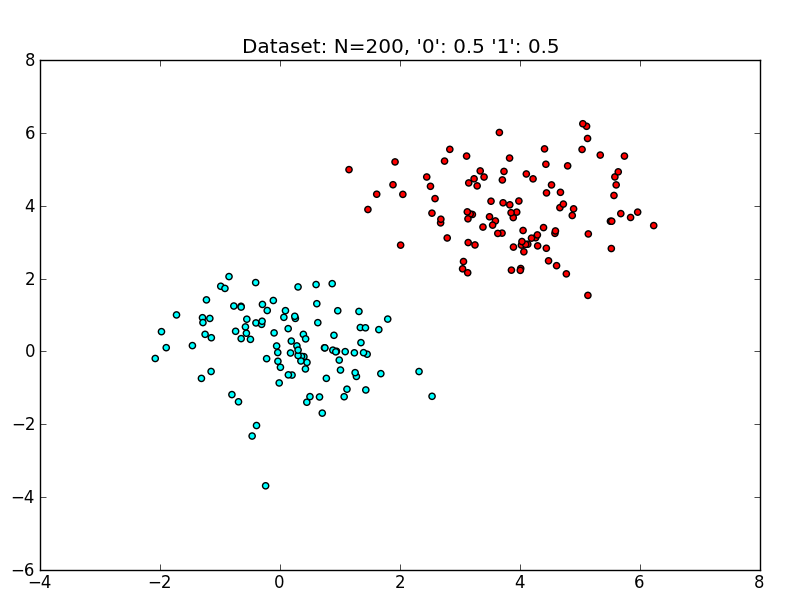

In [2]:
print ("Figure1 : A two class Linearly seperable dataset with infinite number of classification lines [13]") 
from IPython.display import Image
Image("images/svm2.png")

Figure2 : The Decision Boundary of a Linear SVM on a linearly-separable dataset [13]


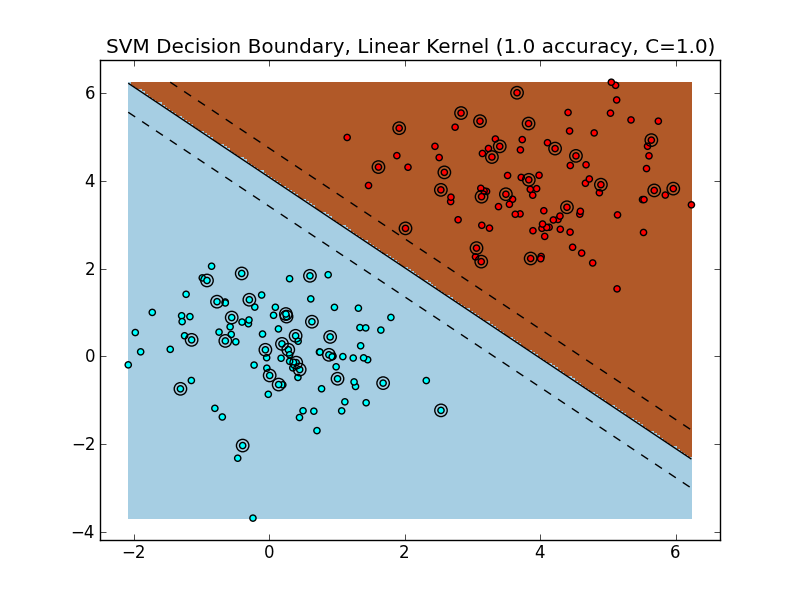

In [1]:
print ("Figure2 : The Decision Boundary of a Linear SVM on a linearly-separable dataset [13]")
from IPython.display import Image
Image("images/svm1.png")


Figure3 : Linearly inseperable dataset [13]


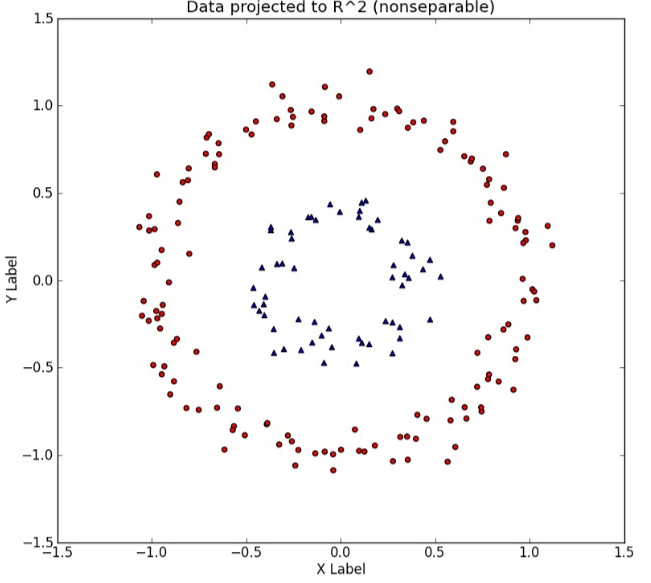

In [3]:
print ("Figure3 : Linearly inseperable dataset [13]")
from IPython.display import Image
Image("images/svm5.png")


Figure3 : Applying polynomial kernel trict to seperate linearly inseperable dataset [13]


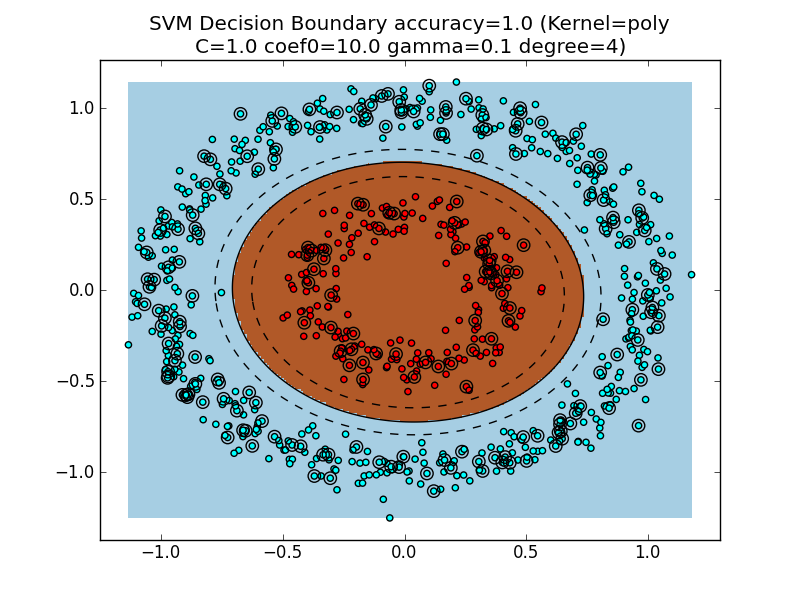

In [4]:
print ("Figure3 : Applying polynomial kernel trict to seperate linearly inseperable dataset [13]")
from IPython.display import Image
Image("images/svm7.png")


## 5. Choosing the Best Model: Fine-tune
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.

- What is the model's final F<sub>1</sub> score?

####Ans:
After a thorough grid-search, final F<sub>1</sub> score is 0.821, which is very small improvement over the previous model.


In [327]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
svc_clf = SVC()

parameters = {'kernel': ['linear','rbf'], 'C': (0.01,0.05,0.50,0.75,1,2,5),
              'gamma':(0,0.001,1,0.5)}
f1_scorer = make_scorer(f1_score, pos_label="yes")

clf = GridSearchCV(svc_clf, parameters, scoring = f1_scorer,cv=3)

clf.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': (0.01, 0.05, 0.5, 0.75, 1, 2, 5), 'gamma': (0, 0.001, 1, 0.5)},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(f1_score, pos_label=yes), verbose=0)

In [328]:
y_pred=clf.predict(X_test)
best_F1_score = '{0:.3f}'.format(f1_score(y_pred,y_test, pos_label='yes'))

print "Best F1 Score: " +  best_F1_score
print "\nBest model parameter:  " + str( clf.best_params_)
print "\nBest estimator:\n{}".format(clf.best_estimator_)


Best F1 Score: 0.821

Best model parameter:  {'kernel': 'linear', 'C': 0.01, 'gamma': 0}

Best estimator:
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


#### References:
1. http://rstudio-pubs-static.s3.amazonaws.com/4239_fcb292ade17648b097a9806fbe026e74.html
2. http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
3. https://scholar.sun.ac.za/handle/10019.1/5360
4. http://research.microsoft.com/en-us/projects/decisionforests/
5. http://www.cs.cmu.edu/~qyj/papersA08/11-rfbook.pdf
6. http://www.ijcsi.org/papers/4-1-16-23.pdf
7. http://software.ucv.ro/~cmihaescu/ro/teaching/AIR/docs/Lab4-NaiveBayes.pdf
8. http://u.cs.biu.ac.il/~haimga/Teaching/AI/saritLectures/svm.pdf
9. http://www.distilnetworks.com/support-vector-machines-hadoop-theory-vs-practice/#.V1ciD5ErKhc 

10. http://www.svms.org/finance/ 

11. http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html 

12.  https://panthimanshu17.wordpress.com/2013/07/28/svm-fundamentals-part-1/ 

13.  http://www.support-vector.net/icml-tutorial.pdf